In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values,remove_value
from ipynb.fs.full.plots import single_barplot

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df['D3_Company_Size'].head(10)

2         1,001-2,000 employees
3     More than 2,000 employees
4              51-250 employees
5     More than 2,000 employees
6           501-1,000 employees
7         1,001-2,000 employees
8                1-10 employees
9     More than 2,000 employees
10                            0
11                            0
Name: D3_Company_Size, dtype: object

In [4]:
# mapping of old labels to new one
d3_rename_mapping = {
    '1-10 employees': '1-10',
    '11-50 employees': '11-50',
    '51-250 employees': '51-250',
    '251-500 employees': '251-500',
    '501-1,000 employees': '501-1000',
    '1,001-2,000 employees': '1001-2000',
    'More than 2,000 employees': '+2000'
}

In [5]:
df['D3_Company_Size'].value_counts().index

Index(['More than 2,000 employees', '51-250 employees', '11-50 employees',
       '1,001-2,000 employees', '0', '1-10 employees', '251-500 employees',
       '501-1,000 employees'],
      dtype='object')

In [6]:
remove_value(df,'0','D3_Company_Size')
# index of our barplot
indexes = list(df['D3_Company_Size'].value_counts().index)
# total answers of each index
values = list(df['D3_Company_Size'].value_counts())
# dataframe specific for question D3
d3_df= pd.DataFrame(data={'Company Size': rename_values(d3_rename_mapping, indexes), 'Answers': values})

In [7]:
indexes = list(df['D3_Company_Size'].value_counts().index)
indexes

['More than 2,000 employees',
 '51-250 employees',
 '11-50 employees',
 '1,001-2,000 employees',
 '1-10 employees',
 '251-500 employees',
 '501-1,000 employees']

In [8]:
values = list(df['D3_Company_Size'].value_counts())
values

[112, 42, 28, 23, 21, 20, 7]

In [9]:
d3_df

,Company Size,Answers
0,+2000,112
1,51-250,42
2,11-50,28
3,1001-2000,23
4,1-10,21
5,251-500,20
6,501-1000,7


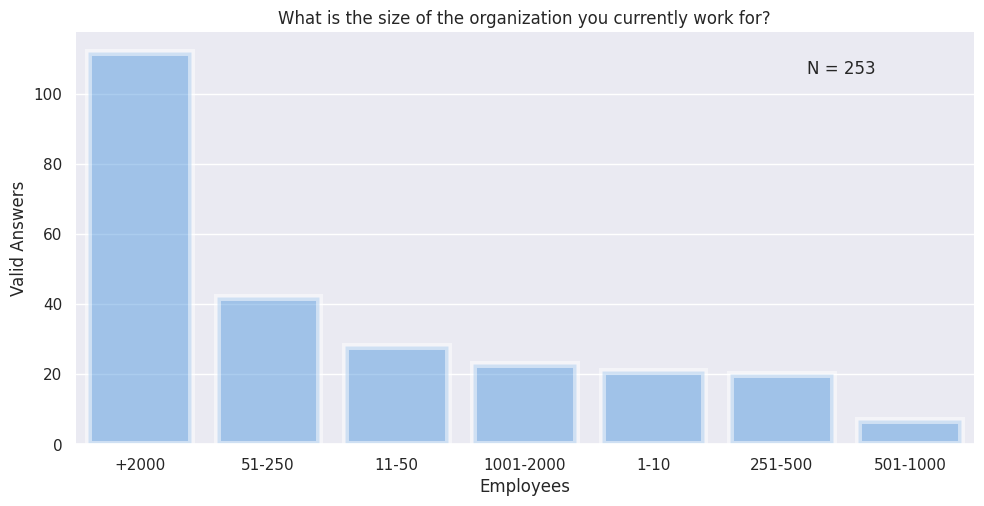

In [10]:
# compute total of answer considered in this question
total_answers = "N = " + str(sum(d3_df['Answers']))

single_barplot(d3_df, "Company Size", "Answers", title="What is the size of the organization you currently work for?",
               x_label="Employees", y_label="Valid Answers", x_label_rotation=0, color="#429bf5", 
               total_answers=total_answers, bar_orientation='vertical')